In [1]:
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, BrunnerNN_relative, BrunnerNN_real, EconNN, JMolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter

methods = [BrunnerNN_reciprocal(), BrunnerNN_relative(), BrunnerNN_real(), EconNN(), JMolNN(),
           MinimumDistanceNN(), MinimumOKeeffeNN(), MinimumVIRENN(), VoronoiNN(), VoronoiNN_modified(),
           HumanInterpreter(cations=True), CrystalNN()]

structure_groups = ["common_binaries", "zeolites", "mixed", "elemental"] 

#structure_groups = ["elemental"]

unique_sites = 13

algo = ["BrunnerNN_reciprocal", "BrunnerNN_relative", "BrunnerNN_real", "CrystalNN", "EconNN", "JMolNN",
        "MinimumDistanceNN", "MinimumOKeeffeNN", "MinimumVIRENN", "VoronoiNN", "VoronoiNN_modified"]

In [2]:
uw_bm = Benchmark(methods=methods, structure_groups=structure_groups, unique_sites=True,
                  use_weights=False, cations=True)
uw_bm.benchmark()

uw = uw_bm.report(totals=False, separate_columns=True, max_sites=unique_sites)
uw

Initialization successful.


,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,CrystalNN0,CrystalNN1,CrystalNN10,CrystalNN11,CrystalNN12,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,EconNN0,EconNN1,EconNN10,EconNN11,EconNN12,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,HumanInterpreter0,HumanInterpreter1,HumanInterpreter10,HumanInterpreter11,HumanInterpreter12,HumanInterpreter2,HumanInterpreter3,HumanInterpreter4,HumanInterpreter5,HumanInterpreter6,HumanInterpreter7,HumanInterpreter8,HumanInterpreter9,JMolNN0,JMolNN1,JMolNN10,JMolNN11,JMolNN12,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,VoronoiNN0,VoronoiNN1,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9
Al2O3_corundum,{'O': 12},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 12},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{'O': 8},{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O2-': 6},"{'Al3+': 4, 'O2-': 4}",{},{},{},{},{},{},{},{},{},{},{},{'O': 12},{'O': 12},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{}
CaF2_fluorite,{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8.0},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F-': 8},{'Ca2+': 4},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 13},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 

In [3]:
from materialscoord.nb_funcs import nb_funcs # used to calculate algo accuracy scores
nbf_uw = nb_funcs(uw, algo, unique_sites=unique_sites, cations=True)

In [4]:
# take out MinimumVIRENN oxidation states e.g. 'O2-' and 'F-'
mv_uw = nbf_uw.mv_df()
mv_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,CrystalNN0,CrystalNN1,CrystalNN10,CrystalNN11,CrystalNN12,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,EconNN0,EconNN1,EconNN10,EconNN11,EconNN12,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,HumanInterpreter0,HumanInterpreter1,HumanInterpreter10,HumanInterpreter11,HumanInterpreter12,HumanInterpreter2,HumanInterpreter3,HumanInterpreter4,HumanInterpreter5,HumanInterpreter6,HumanInterpreter7,HumanInterpreter8,HumanInterpreter9,JMolNN0,JMolNN1,JMolNN10,JMolNN11,JMolNN12,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,VoronoiNN0,VoronoiNN1,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9
Al2O3_corundum,{'O': 12},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 12},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{'O': 8},{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},"{'Al': 4, 'O': 4}",{},{},{},{},{},{},{},{},{},{},{},{'O': 12},{'O': 12},{},{},{},{},{},{},{},{},{},{},{},{'O': 6},{},{},{},{},{},{},{},{},{},{},{},{}
CaF2_fluorite,{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8.0},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'Ca': 4},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 13},{},{},{},{},{},{},{},{},{},{},{},{'F': 8},{'F': 6},{},{},{},{},{},{},{},{},{},{},{}
ZnS_zincblende,{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 4},{},{},

In [5]:
# subtract human interpreted value from algo-calculated value
sub_uw = nbf_uw.sub_hi()
sub_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,CrystalNN10,CrystalNN11,CrystalNN12,EconNN0,EconNN1,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,EconNN10,EconNN11,EconNN12,JMolNN0,JMolNN1,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,JMolNN10,JMolNN11,JMolNN12,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12
Al2O3_corundum,{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{'O': 8},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},"{'Al': 4, 'O': 4}",{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 12},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{}
CaF2_fluorite,{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': -8.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'Ca': 4},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 13},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{}
ZnS_zincblende,{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{'Zn': 4},{},{},{},{},{},{},{},{},{},{},{},{'S': 3.0},{'S': 12},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{}
CsCl,{'Cl': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'Cl': 0.0},{'Cl': 6},{},{},{},

In [6]:
# take abs value of difference
abs_uw = nbf_uw.abs_df()
abs_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,CrystalNN10,CrystalNN11,CrystalNN12,EconNN0,EconNN1,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,EconNN10,EconNN11,EconNN12,JMolNN0,JMolNN1,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,JMolNN10,JMolNN11,JMolNN12,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12
Al2O3_corundum,{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{'O': 8},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},"{'Al': 4, 'O': 4}",{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 12},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{}
CaF2_fluorite,{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'Ca': 4},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 13},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{}
ZnS_zincblende,{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{'Zn': 4},{},{},{},{},{},{},{},{},{},{},{},{'S': 3.0},{'S': 12},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{}
CsCl,{'Cl': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'Cl': 0.0},{'Cl': 6},{},{},{},{

In [7]:
# adds two new columns
# df['num equiv site atoms'] (list): of how many equivalent sites there are for particular unique site
# df['num unit cell atoms'] (int): number of cations in unit cell
cs_uw = nbf_uw.cif_stats()
cs_uw

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,CrystalNN10,CrystalNN11,CrystalNN12,EconNN0,EconNN1,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,EconNN10,EconNN11,EconNN12,JMolNN0,JMolNN1,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,JMolNN10,JMolNN11,JMolNN12,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12,num equiv site atoms,num cations
Al2O3_corundum,{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 32},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{'O': 8},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},"{'Al': 4, 'O': 4}",{},{},{},{},{},{},{},{},{},{},{},{'O': 6.0},{'O': 12},{},{},{},{},{},{},{},{},{},{},{},{'O': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},"[4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",6
CaF2_fluorite,{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},{'F': 8.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'Ca': 4},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 13},{},{},{},{},{},{},{},{},{},{},{},{'F': 0.0},{'F': 6},{},{},{},{},{},{},{},{},{},{},{},"[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2
ZnS_zincblende,{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},{'Zn': 4},{},{},{},{},{},{},{},{},{},{},{},{'S': 3.0},{'S': 12},{},{},{},{},{},{},{},{},{},{},{},{'S': 0.0},

In [8]:
me_df = nbf_uw.mult_equiv()
me_df

,BrunnerNN_real0,BrunnerNN_real1,BrunnerNN_real2,BrunnerNN_real3,BrunnerNN_real4,BrunnerNN_real5,BrunnerNN_real6,BrunnerNN_real7,BrunnerNN_real8,BrunnerNN_real9,BrunnerNN_real10,BrunnerNN_real11,BrunnerNN_real12,BrunnerNN_reciprocal0,BrunnerNN_reciprocal1,BrunnerNN_reciprocal2,BrunnerNN_reciprocal3,BrunnerNN_reciprocal4,BrunnerNN_reciprocal5,BrunnerNN_reciprocal6,BrunnerNN_reciprocal7,BrunnerNN_reciprocal8,BrunnerNN_reciprocal9,BrunnerNN_reciprocal10,BrunnerNN_reciprocal11,BrunnerNN_reciprocal12,BrunnerNN_relative0,BrunnerNN_relative1,BrunnerNN_relative2,BrunnerNN_relative3,BrunnerNN_relative4,BrunnerNN_relative5,BrunnerNN_relative6,BrunnerNN_relative7,BrunnerNN_relative8,BrunnerNN_relative9,BrunnerNN_relative10,BrunnerNN_relative11,BrunnerNN_relative12,CrystalNN0,CrystalNN1,CrystalNN2,CrystalNN3,CrystalNN4,CrystalNN5,CrystalNN6,CrystalNN7,CrystalNN8,CrystalNN9,CrystalNN10,CrystalNN11,CrystalNN12,EconNN0,EconNN1,EconNN2,EconNN3,EconNN4,EconNN5,EconNN6,EconNN7,EconNN8,EconNN9,EconNN10,EconNN11,EconNN12,JMolNN0,JMolNN1,JMolNN2,JMolNN3,JMolNN4,JMolNN5,JMolNN6,JMolNN7,JMolNN8,JMolNN9,JMolNN10,JMolNN11,JMolNN12,MinimumDistanceNN0,MinimumDistanceNN1,MinimumDistanceNN2,MinimumDistanceNN3,MinimumDistanceNN4,MinimumDistanceNN5,MinimumDistanceNN6,MinimumDistanceNN7,MinimumDistanceNN8,MinimumDistanceNN9,MinimumDistanceNN10,MinimumDistanceNN11,MinimumDistanceNN12,MinimumOKeeffeNN0,MinimumOKeeffeNN1,MinimumOKeeffeNN2,MinimumOKeeffeNN3,MinimumOKeeffeNN4,MinimumOKeeffeNN5,MinimumOKeeffeNN6,MinimumOKeeffeNN7,MinimumOKeeffeNN8,MinimumOKeeffeNN9,MinimumOKeeffeNN10,MinimumOKeeffeNN11,MinimumOKeeffeNN12,MinimumVIRENN0,MinimumVIRENN1,MinimumVIRENN2,MinimumVIRENN3,MinimumVIRENN4,MinimumVIRENN5,MinimumVIRENN6,MinimumVIRENN7,MinimumVIRENN8,MinimumVIRENN9,MinimumVIRENN10,MinimumVIRENN11,MinimumVIRENN12,VoronoiNN0,VoronoiNN1,VoronoiNN2,VoronoiNN3,VoronoiNN4,VoronoiNN5,VoronoiNN6,VoronoiNN7,VoronoiNN8,VoronoiNN9,VoronoiNN10,VoronoiNN11,VoronoiNN12,VoronoiNN_modified0,VoronoiNN_modified1,VoronoiNN_modified2,VoronoiNN_modified3,VoronoiNN_modified4,VoronoiNN_modified5,VoronoiNN_modified6,VoronoiNN_modified7,VoronoiNN_modified8,VoronoiNN_modified9,VoronoiNN_modified10,VoronoiNN_modified11,VoronoiNN_modified12,num equiv site atoms,num cations
Al2O3_corundum,"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [32, 32, 32, 32, 32, 32]}",{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [32, 32, 32, 32, 32, 32]}",{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [8, 8, 8, 8, 8, 8]}",{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}","{'Al': [4, 4, 4, 4, 4, 4], 'O': [4, 4, 4, 4, 4...",{},{},{},{},{},{},{},{},{},{},{},"{'O': [6.0, 6.0, 6.0, 6.0]}","{'O': [12, 12, 12, 12, 12, 12]}",{},{},{},{},{},{},{},{},{},{},{},"{'O': [0.0, 0.0, 0.0, 0.0]}",{},{},{},{},{},{},{},{},{},{},{},{},"[4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",6
CaF2_fluorite,{'F': [0.0]},"{'F': [6, 6]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'F': [6, 6]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'F': [6, 6]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},{},{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'F': [6, 6]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [8.0]},{},{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},{},{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},{},{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'Ca': [4, 4]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'F': [13, 13]}",{},{},{},{},{},{},{},{},{},{},{},{'F': [0.0]},"{'F': [6, 6]}",{},{},{},{},{},{},{},{},{},{},{},"[1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2
ZnS_zincblende,{'S': [0.0]},{},{},{},{},{},{},{},{},{},{},{},{},{'S': [0.0]},{},{},{},{},{},{},{},{},{},{}

In [9]:
merge_df = nbf_uw.merge_me()
merge_df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,"{'O': [6.0, 6.0, 6.0, 6.0, 32, 32, 32, 32, 32,...","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [6.0, 6.0, 6.0, 6.0, 32, 32, 32, 32, 32,...","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 8, 8, 8, 8, 8, 8]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 4, 4, 4, 4, 4, 4], ...","{'O': [6.0, 6.0, 6.0, 6.0, 12, 12, 12, 12, 12,...","{'O': [0.0, 0.0, 0.0, 0.0]}"
CaF2_fluorite,"{'F': [0.0, 6, 6]}","{'F': [0.0, 6, 6]}","{'F': [0.0, 6, 6]}",{'F': [0.0]},"{'F': [0.0, 6, 6]}",{'F': [8.0]},{'F': [0.0]},{'F': [0.0]},"{'F': [0.0], 'Ca': [4, 4]}","{'F': [0.0, 13, 13]}","{'F': [0.0, 6, 6]}"
ZnS_zincblende,{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},{'S': [0.0]},"{'S': [0.0], 'Zn': [4]}","{'S': [3.0, 12]}",{'S': [0.0]}
CsCl,{'Cl': [0.0]},"{'Cl': [0.0, 6]}",{'Cl': [0.0]},{'Cl': [0.0]},"{'Cl': [0.0, 6]}",{'Cl': [8.0]},{'Cl': [0.0]},{'Cl': [8.0]},"{'Cs': [6, 8], 'Cl': [0.0]}","{'Cl': [0.0, 6]}",{'Cl': [0.0]}
NaCl_rocksalt,{'Cl': [0.0]},{'Cl': [0.0]},{'Cl': [0.0]},{'Cl': [0.0]},"{'Cl': [0.0, 12]}",{'Cl': [6.0]},{'Cl': [0.0]},{'Cl': [0.0]},"{'Cl': [0.0], 'Na': [6]}","{'Cl': [2.0, 6]}",{'Cl': [0.0]}
MgAl2O4_spinel,"{'O': [36.0, 36.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [36.0, 36.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, ...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Mg': [1...","{'O': [12.0, 12.0, 0.0, 0.0, 0.0, 0.0, 12, 12,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}"
TiO2_anatase,"{'O': [0.0, 0.0, 16, 16, 16, 16]}","{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 16, 16, 16, 16]}","{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 6, 6, 6, 6]}","{'O': [0.0, 0.0]}","{'O': [0.0, 0.0]}","{'O': [0.0, 0.0]}","{'O': [0.0, 0.0, 2, 2, 2, 2], 'Ti': [3, 3, 3, 3]}","{'O': [0.0, 0.0, 14, 14, 14, 14]}","{'O': [0.0, 0.0]}"
ZnS_wurtzite,"{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0]}","{'S': [0.0, 0.0], 'Zn': [4, 4]}","{'S': [1.0, 1.0, 6, 6]}","{'S': [0.0, 0.0]}"
Fe3O4_spinel,"{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 3, ...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Fe': [1...","{'O': [0.0, 0.0, 0.0, 0.0, 12.0, 12.0, 12, 12,...","{'O': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}"
SiO2_mp-555235_computed,"{'O': [18.0, 18.0, 19.0, 19.0, 23, 23, 24, 24,...","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [18.0, 18.0, 19.0, 19.0, 23, 23, 24, 24,...","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0]}","{'O': [0.0, 0.0, 0.0, 0.0], 'Si': [2, 2, 2, 2,...","{'O': [2.0, 2.0, 4.0, 4.0, 21, 21, 13, 13, 17,...","{'O': [0.0, 0.0, 0.0, 0.0]}"


In [10]:
tot_df = nbf_uw.tot()
tot_df

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified,num cations
Al2O3_corundum,216.0,0.0,216.0,0.0,48.0,0.0,0.0,0.0,24.0,96.0,0.0,6
CaF2_fluorite,12.0,12.0,12.0,0.0,12.0,8.0,0.0,0.0,8.0,26.0,12.0,2
ZnS_zincblende,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,0.0,1
CsCl,0.0,6.0,0.0,0.0,6.0,8.0,0.0,8.0,0.0,6.0,0.0,1
NaCl_rocksalt,0.0,0.0,0.0,0.0,12.0,6.0,0.0,0.0,6.0,8.0,0.0,1
MgAl2O4_spinel,96.0,0.0,96.0,0.0,24.0,0.0,0.0,0.0,8.0,120.0,0.0,8
TiO2_anatase,64.0,0.0,64.0,0.0,24.0,0.0,0.0,0.0,12.0,56.0,0.0,4
ZnS_wurtzite,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,14.0,0.0,2
Fe3O4_spinel,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,8.0,120.0,0.0,8
SiO2_mp-555235_computed,270.0,0.0,270.0,0.0,0.0,0.0,0.0,0.0,16.0,144.0,0.0,8


In [11]:
# divide by number of cations
div_uw = nbf_uw.div_df()
div_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified,num cations
Al2O3_corundum,36.000000,0.000000,36.000000,0.000000,8.000000,0.000000,0.000000,0.000000,4.000000,16.000000,0.000000,6
CaF2_fluorite,6.000000,6.000000,6.000000,0.000000,6.000000,4.000000,0.000000,0.000000,4.000000,13.000000,6.000000,2
ZnS_zincblende,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,0.000000,1
CsCl,0.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000,8.000000,0.000000,6.000000,0.000000,1
NaCl_rocksalt,0.000000,0.000000,0.000000,0.000000,12.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000,1
MgAl2O4_spinel,12.000000,0.000000,12.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,8
TiO2_anatase,16.000000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,3.000000,14.000000,0.000000,4
ZnS_wurtzite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,0.000000,2
Fe3O4_spinel,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,8
SiO2_mp-555235_computed,33.750000,0.000000,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000,8


In [12]:
# drops 'num unit cell atoms' column
final_uw = nbf_uw.final()
final_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,36.000000,0.000000,36.000000,0.000000,8.000000,0.000000,0.000000,0.000000,4.000000,16.000000,0.000000
CaF2_fluorite,6.000000,6.000000,6.000000,0.000000,6.000000,4.000000,0.000000,0.000000,4.000000,13.000000,6.000000
ZnS_zincblende,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,0.000000
CsCl,0.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000,8.000000,0.000000,6.000000,0.000000
NaCl_rocksalt,0.000000,0.000000,0.000000,0.000000,12.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000
MgAl2O4_spinel,12.000000,0.000000,12.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
TiO2_anatase,16.000000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,3.000000,14.000000,0.000000
ZnS_wurtzite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,0.000000
Fe3O4_spinel,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
SiO2_mp-555235_computed,33.750000,0.000000,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000


In [13]:
final_uw.loc['total'] = final_uw.sum(axis=0)
final_uw

,BrunnerNN_real,BrunnerNN_reciprocal,BrunnerNN_relative,CrystalNN,EconNN,JMolNN,MinimumDistanceNN,MinimumOKeeffeNN,MinimumVIRENN,VoronoiNN,VoronoiNN_modified
Al2O3_corundum,36.000000,0.000000,36.000000,0.000000,8.000000,0.000000,0.000000,0.000000,4.000000,16.000000,0.000000
CaF2_fluorite,6.000000,6.000000,6.000000,0.000000,6.000000,4.000000,0.000000,0.000000,4.000000,13.000000,6.000000
ZnS_zincblende,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,0.000000
CsCl,0.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000,8.000000,0.000000,6.000000,0.000000
NaCl_rocksalt,0.000000,0.000000,0.000000,0.000000,12.000000,6.000000,0.000000,0.000000,6.000000,8.000000,0.000000
MgAl2O4_spinel,12.000000,0.000000,12.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
TiO2_anatase,16.000000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,3.000000,14.000000,0.000000
ZnS_wurtzite,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,7.000000,0.000000
Fe3O4_spinel,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
SiO2_mp-555235_computed,33.750000,0.000000,33.750000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,18.000000,0.000000


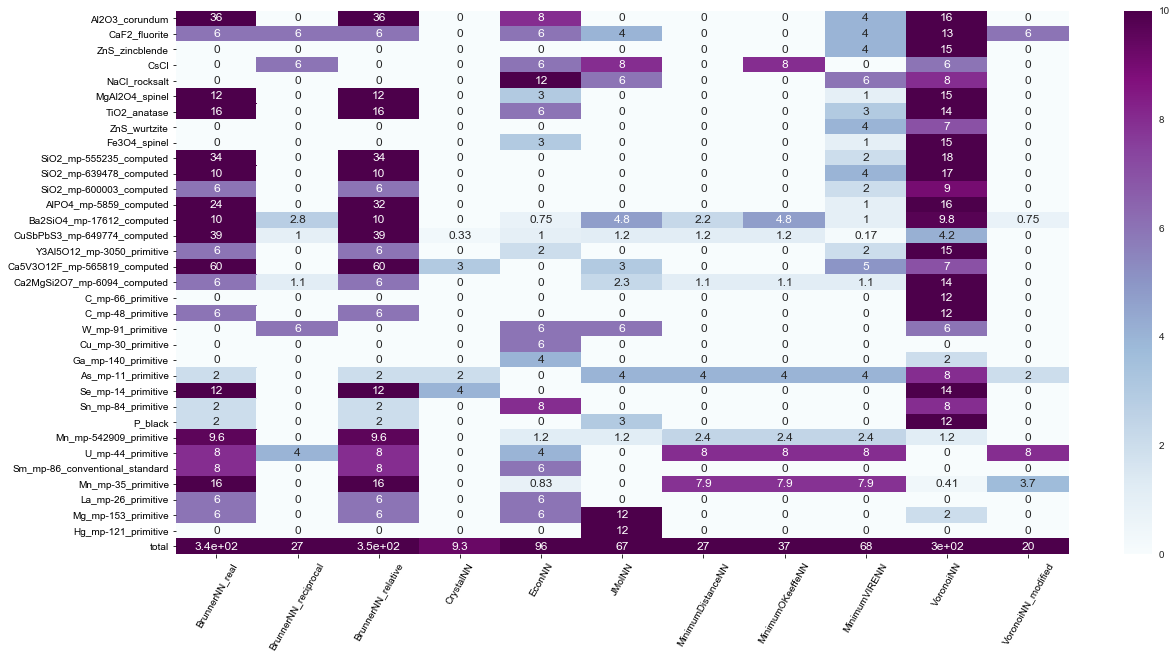

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

sns.set(font='Times New Roman')
sns.set(font_scale=1)

hm = sns.heatmap(final_uw, annot=True, cmap="BuPu", vmax=10)

ax.set_xticklabels(final_uw.columns.tolist(), rotation=60)
ax.set_yticklabels(final_uw.index.tolist())


plt.show()